In [167]:
from __future__ import print_function  # used for making Python 2 print function act like python3 function

In [24]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

# Stroop Data Analysis in Pandas

## 1. Load Data into a Pandas DataFrame

In [2]:
df = pd.read_csv('StroopData.csv')
df.head()

,respcolor,stimcolor,trialnum,subject,stimword,reaction_time
0,Y,Y,1.0,156772.0,Y,1389.0
1,G,G,2.0,156772.0,G,2043.0
2,R,R,3.0,156772.0,R,1389.0
3,Y,Y,4.0,156772.0,Y,1092.0
4,G,G,5.0,156772.0,G,1310.0


How Many Trials were there in total, across all subjects?

In [3]:
len(df)

2803

What was the Maximum number of trials any subject did? The minimum?

In [7]:
ts = df.groupby('subject')['trialnum'].count()
f"Max: {ts.max()}, Min: {ts.min()}"

'Max: 90, Min: 85'

How Many subjects were there in this study?

In [10]:
df['subject'].drop_duplicates().count()

32

In [11]:
len(df.groupby('subject'))

32

In [13]:
df['subject'].nunique()

32

In [15]:
len(df['subject'].unique())

32

In [18]:
len(set(df['subject']))

32

What is the mean response Time, across all subjects and conditions?

In [19]:
df['reaction_time'].mean()

1703.5362112022833

Plot a histogram of the response times

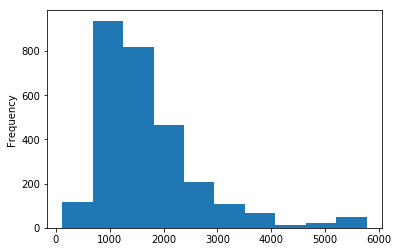

In [20]:
df['reaction_time'].plot.hist()

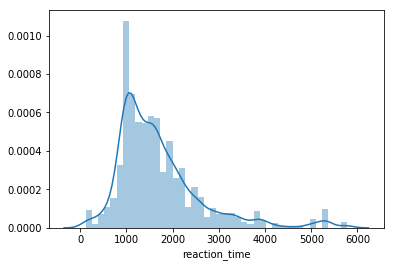

In [22]:
sns.distplot(df['reaction_time'])

What was the mean response time for each subject?

In [23]:
df.groupby('subject')['reaction_time'].mean()

subject
156772.0    1339.344444
156839.0     601.711111
156856.0    1080.044444
156857.0    1523.977528
156858.0    1523.977528
156859.0    1523.977528
156860.0    2058.443182
156861.0    2058.443182
156862.0    1523.977528
156863.0    2058.443182
156864.0    1700.865169
156865.0    1700.865169
156866.0    1700.865169
156867.0    1700.865169
156868.0    1671.988889
156869.0    1700.865169
156870.0    1700.865169
156871.0    1700.865169
156872.0    2064.712644
156873.0    1700.865169
156874.0    1700.865169
156875.0    1844.541176
156876.0    1844.541176
156877.0    1844.541176
156878.0    1844.541176
156879.0    1844.541176
156880.0    1844.541176
156881.0    1844.541176
156882.0    1844.541176
156883.0    1844.541176
156884.0    1844.541176
156885.0    1844.541176
Name: reaction_time, dtype: float64

Log transform the reaction Times

In [26]:
df['log_reaction_time'] = np.log(df['reaction_time'])
df.head()

,respcolor,stimcolor,trialnum,subject,stimword,reaction_time,log_reaction_time
0,Y,Y,1.0,156772.0,Y,1389.0,7.236339
1,G,G,2.0,156772.0,G,2043.0,7.622175
2,R,R,3.0,156772.0,R,1389.0,7.236339
3,Y,Y,4.0,156772.0,Y,1092.0,6.995766
4,G,G,5.0,156772.0,G,1310.0,7.177782


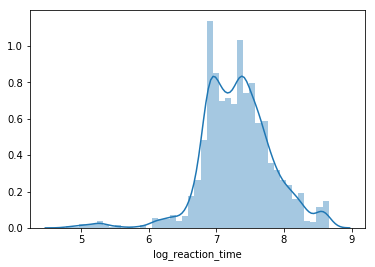

In [27]:
sns.distplot(df['log_reaction_time'])

Reject Bad Data: Log Reaction Time > 5.7

In [36]:
dfgood = df[df['log_reaction_time'] > 5.7]
dfgood.head()
f"Kept {len(dfgood) / len(df):.2%} of data"

'Kept 98.68% of data'

In [37]:
dfgood.to_excel('GoodStroop.xlsx')

From here on, use only the accepted data!

In [43]:
dfgood = dfgood.copy()

## Overall, what was the accuracy of the responses?

  - How many trials, in total, were correct (stimcolor matched respcolor)?
  - How many trials were incorrect?
  - What percent accuract was there, overall?

In [44]:
dfgood['isCorrect'] = dfgood['stimcolor'] == dfgood['respcolor']

dfgood.head()

,respcolor,stimcolor,trialnum,subject,stimword,reaction_time,log_reaction_time,isCorrect,isMatched
0,Y,Y,1.0,156772.0,Y,1389.0,7.236339,True,True
1,G,G,2.0,156772.0,G,2043.0,7.622175,True,True
2,R,R,3.0,156772.0,R,1389.0,7.236339,True,True
3,Y,Y,4.0,156772.0,Y,1092.0,6.995766,True,True
4,G,G,5.0,156772.0,G,1310.0,7.177782,True,True


In [45]:
dfgood['isCorrect'].mean()

0.970354302241504

## Matched vs Unmatched Colors

 - What weas the mean log response time for Congruent trials (the stimulus word and color matched each other)?
 - What was the mean log response time for Incongruent trials (when the stimulus word and color did not match each other)?

In [46]:
dfgood['isMatched'] = dfgood['stimword'] == dfgood['stimcolor']
dfgood.groupby('isMatched')['isCorrect'].mean()

isMatched
False    0.961481
True     0.978814
Name: isCorrect, dtype: float64

## Make a Bar Graph of Mean Log Response Time

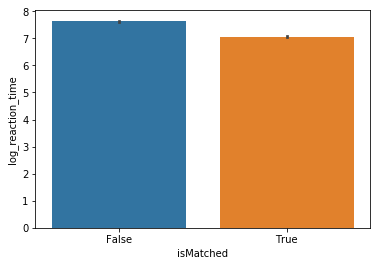

In [54]:
sns.barplot(data=dfgood, x='isMatched', y='log_reaction_time')

## Make a Scatter Plot: Change in Performance over Time

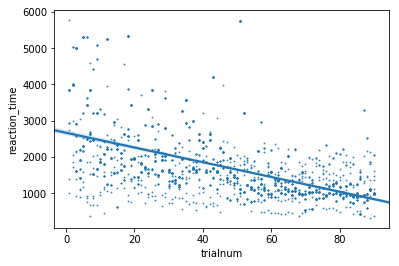

In [94]:
sns.regplot(x='trialnum', y='reaction_time', data=dfgood, fit_reg=True, scatter_kws=dict(alpha=.8, s=.8))

## Do all subjects show a difference in response time between the Congruent and Incogruent conditions, or is this just coming from a few subjects?

Plot a histogram of the difference in mean log reaction times between conditions for each subject.  What do you think, should anyone be rejected?

In [64]:
dfgood.columns

Index(['respcolor', 'stimcolor', 'trialnum', 'subject', 'stimword',
       'reaction_time', 'log_reaction_time', 'isCorrect', 'isMatched'],
      dtype='object')

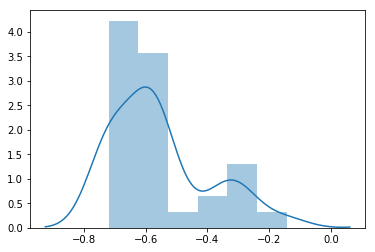

In [81]:
times = dfgood.groupby(['subject', 'isMatched'])['log_reaction_time'].mean()
tt = times.unstack()
tt_diffs = tt[True] - tt[False]
sns.distplot(tt_diffs)

## Plot the mean reaction times for each condition, for each subject.

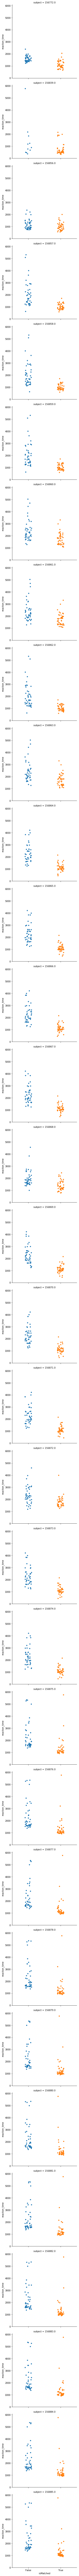

In [84]:
sns.catplot(row='subject', y='reaction_time', x='isMatched', data=dfgood)

## Participant Response Speed vs Size of Stroop Effect
Make a scatter plot showing the relationship between how quickly subjects responded for congruent and incongruent stimuli (mean response to each stimulus category)!